In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv

In [4]:
def distll(alon,alat,blon,blat):
    r180 = 1.0/180.0
    pi = 4.0*np.arctan(1.0)
    re = 6371*10^3
    
    lon1 = alon*pi*r180
    lon2 = blon*pi*r180
    lat1 = alat*pi*r180
    lat2 = blat*pi*r180
    
    cosd = np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)
    for i in range(len(lon1)):
        cosd[i] = min(1.0,cosd[i])
        cosd[i] = max(-1.0,cosd[i])
    dist = np.arccos(cosd)*re
    return dist

In [62]:
nlon=96
nlat=48
sigr=800*10^3
lon=np.array([360.0/nlon*i for i in range(nlon)])
lat=np.array([-87.159,-83.479,-79.777,-76.070,-72.362,-68.652,-64.942,-61.232,-57.521,-53.810,-50.099,-46.389,-42.678,\
              -38.967,-35.256,-31.545,-27.833,-24.122,-20.411,-16.700,-12.989,-9.278,-5.567,-1.856,1.856,5.567,9.278,\
              12.989,16.700,20.411,24.122,27.833,31.545,35.256,38.967,42.678,46.389,50.099,53.810,57.521,61.232,64.942,\
              68.652,72.362,76.070,79.777,83.479,87.159])
lon0=lon
for i in range(nlat-1):
    lon0=np.hstack([lon0,lon])
#print(alon)
lat0=np.ones(nlon)*lat[0]
for i in range(nlat-1):
    lat1=np.ones(nlon)*lat[i+1]
    lat0=np.hstack([lat0,lat1])
print(len(lat0))
alon=lon0[-nlon*4:]
alat=lat0[-nlon*4:]
dist=np.empty([len(alon),len(alon)])
for i in range(len(alon)):
    blon=alon[i]
    blat=alat[i]
    dist[i]=distll(alon,alat,blon,blat)
dist=np.exp(-dist/(2*sigr))
mask=dist<1.0e-1
dist[mask]=0.0
print(dist)

4608
[[0.99999994 0.93922146 0.88219276 ... 0.46066705 0.4618759  0.46260678]
 [0.93922146 0.99999994 0.93922146 ... 0.45899387 0.46066705 0.4618759 ]
 [0.88219276 0.93922146 0.99999994 ... 0.45687488 0.45899387 0.46066705]
 ...
 [0.46066705 0.45899387 0.45687488 ... 1.         0.98717316 0.97452429]
 [0.4618759  0.46066705 0.45899387 ... 0.98717316 1.         0.98717316]
 [0.46260678 0.4618759  0.46066705 ... 0.97452429 0.98717316 1.        ]]


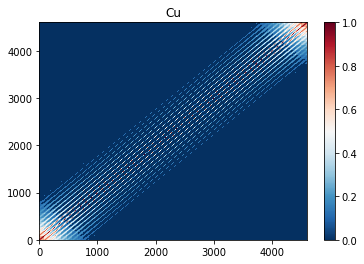

In [21]:
x = np.arange(dist.shape[0])
y = np.arange(dist.shape[1])
plt.pcolor(x,y,dist,cmap='RdBu_r')
plt.colorbar()
plt.title("Cu")
plt.show()

In [63]:
L = np.linalg.cholesky(dist)
L

array([[0.99999997, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93922149, 0.34331172, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88219278, 0.32229322, 0.34331168, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46066707, 0.07668092, 0.07504545, ..., 0.13917931, 0.        ,
        0.        ],
       [0.46187592, 0.07824746, 0.07664068, ..., 0.09278534, 0.13122461,
        0.        ],
       [0.46260679, 0.07976909, 0.07820778, ..., 0.04637867, 0.06561679,
        0.11364125]])

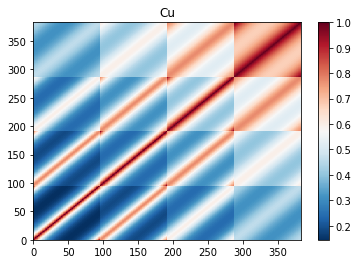

In [64]:
x = np.arange(dist.shape[0])
y = np.arange(dist.shape[1])
plt.pcolor(x,y,dist,cmap='RdBu_r')
plt.colorbar()
plt.title("Cu")
plt.show()

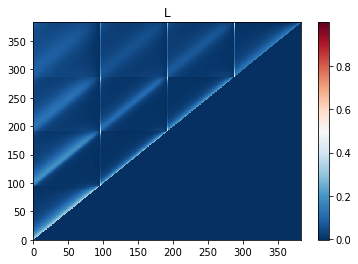

In [65]:
x = np.arange(L.shape[0])
y = np.arange(L.shape[1])
plt.pcolor(x,y,L,cmap='RdBu_r')
plt.colorbar()
plt.title("L")
plt.show()

In [42]:
A = np.array([5.,2.,0.,0.,0.,2.,5.,2.,0.,0.,0.,2.,5.,2.,0.,0.,0.,2.,5.,2.,0.,0.,0.,2.,1.]).reshape(5,5)
print(A)
L = np.linalg.cholesky(A)
print(L)
B = L@L.T
print(B)

[[5. 2. 0. 0. 0.]
 [2. 5. 2. 0. 0.]
 [0. 2. 5. 2. 0.]
 [0. 0. 2. 5. 2.]
 [0. 0. 0. 2. 1.]]
[[2.23606798 0.         0.         0.         0.        ]
 [0.89442719 2.04939015 0.         0.         0.        ]
 [0.         0.97590007 2.01186954 0.         0.        ]
 [0.         0.         0.99410024 2.00293902 0.        ]
 [0.         0.         0.         0.99853265 0.05415304]]
[[5. 2. 0. 0. 0.]
 [2. 5. 2. 0. 0.]
 [0. 2. 5. 2. 0.]
 [0. 0. 2. 5. 2.]
 [0. 0. 0. 2. 1.]]


In [43]:
D,V = np.linalg.eig(A)
print(D)
print(V)

[8.32479266e+00 6.51473162e+00 4.15011037e+00 2.00815289e+00
 2.21245080e-03]
[[ 0.34089684 -0.57017573 -0.60962524  0.43055458  0.04085092]
 [ 0.56670565 -0.43183161  0.25905708 -0.64407673 -0.10208211]
 [ 0.60119256  0.24312124  0.49954028  0.53293498  0.21424143]
 [ 0.43271465  0.61596332 -0.47133414 -0.15315325 -0.43328447]
 [ 0.11815069  0.22338832 -0.29924928 -0.30382942  0.86849043]]


In [38]:
A = np.array([1.,2.,0.,0.,1.,2.,0.,0.,1.]).reshape(3,3)
u, s, vh = np.linalg.svd(A, full_matrices=True)
print(s)

[2.70927536 1.90321193 0.19393657]
